# Telco Customer Churn Prediction

### 1.1 Introduction

Telco receives a lot of customers who subscribe to their service to get access to the fastest possible communication access through mobile and internet services. There are diverse set of applications which Telco gives to their users such as mobile services and communication tools to name a few. 

One of the challenges that the company faces is to get to know beforehand whether a customer who has activated a service under Telco is going to leave or stay in the service (churn). If they know that a customer is going to leave the service based on a set of factors such as Gender and whether they are Senior citizen or not, they can come up with affordable plans or give promotional offers so that they retain the customer without them having to move to options from other companies. 

### 1.2 Machine Learning and Data Science

There are a lot of technologies and tools which are build with the aid of machine learning and data science. Considering that the data size is large and has useful features, it is possible to gain insights from the data and make predictions. After performing sufficient training and hyperparameter tuning, it is possible to get the best predictions for our models.

We try to combat the challenge by Telco with the aid of data science and machine learning. We take the output variable (Customer Churn) and we try to build the models for prediction with diverse set of features respectively. 



### 1.3 Metrics

Since we are working on a classification problem, we need to ensure we select the metrics that are useful for these problems. Below are the metrics that we are going to be using for our problem. 

1. Log Loss 
2. Accuracy
3. Precision
4. Recall
5. F1-score

### 1.4 Source 

The data was downloaded from Kaggle - a website that hosts data science and machine learning challenges from companies. Below is the link for the dataset along with the definition of various columns used in the data. Feel free to take a look. 

https://www.kaggle.com/blastchar/telco-customer-churn

## Table of Contents

### 1. Telco Customer Churn Prediction

1.1 Introduction 

1.2 Machine Learning and Data Science 

1.3 Metrics

1.4 Source

1.5 Importing the libraries

1.6 Reading the first 5 rows

### 2. Exploratory Data Analysis 

2.1 Missingno

_____________________________________________________________________________________________________


### 1.5 Importing the libraries

It is now time to read the libraries that are important for our machine learning problem. There are libraries such as numpy that would ensure that we get to perform computation with arrays.

In addition, we import seaborn which is used for data visualization and plotting respectively. 

from sklearn, we import preprocessing library which contains StandardScaler we are going to be using for transformed our data respectively. 

Matplotlib is similar to seaborn for plotting. It is also sometimes convenient to use this library for plotting rather than solely relying on Seaborn. 

Pandas library is used to work with the dataframe and reading the values present in them. 

In [1]:
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Telco Customer Churn.csv")

### 1.6 Reading the first 5 rows

Let us explore the first 5 rows of our dataframe to get to understand the columns that we are going to be working in the data respectively. 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Using 'describe' ensures that we are getting the values for the numerical columns such as the mean, standard deviation, minimum value and 1st, 2nd, 3rd and Maximum values. 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 2.1 Missingno 

Missingno is a useful library to plot the missing values in our dataframe. If there are any missing values in our data, we get an output for that particular column with white stripes which indicates the presence of missing value.

Let us see from our data if there are any missing values present in them. 

In [5]:
import missingno as msno

<AxesSubplot:>

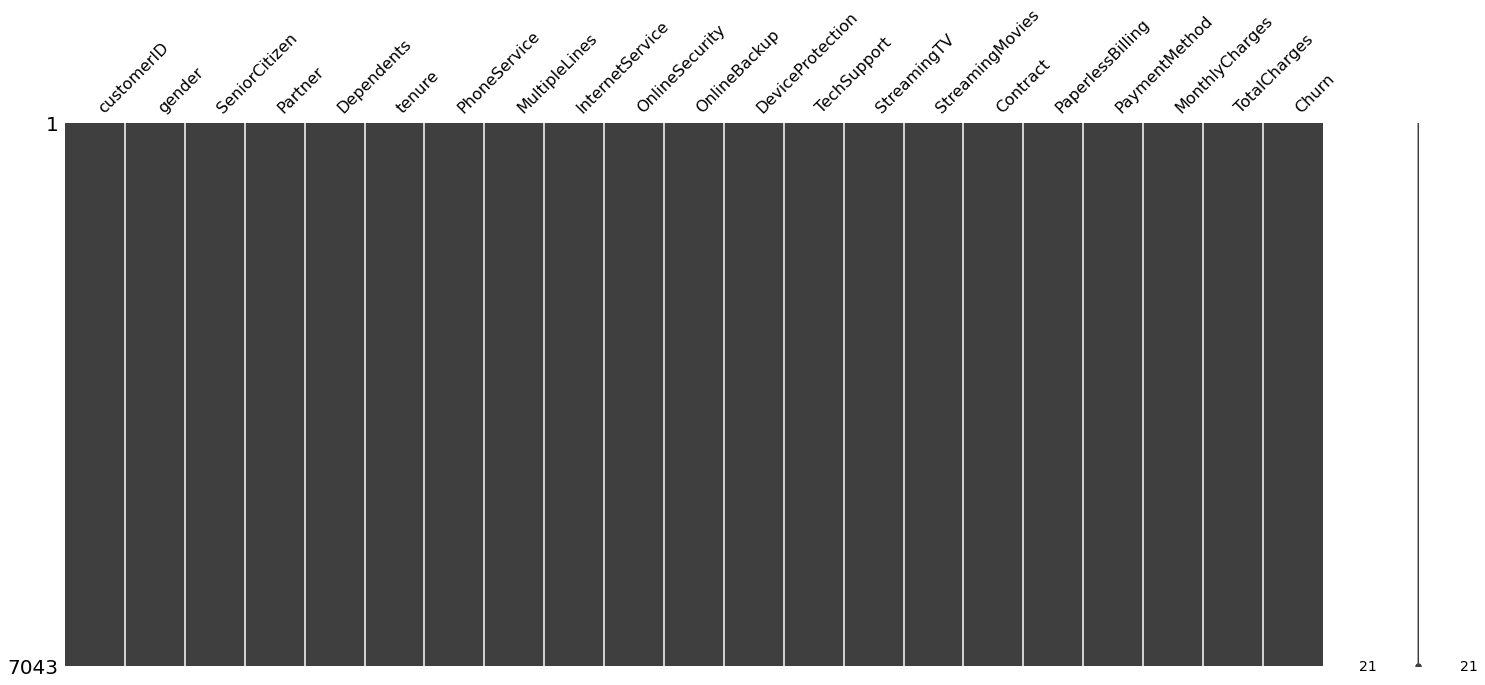

In [6]:
msno.matrix(df)

### Observation: 

We see that there are no missing values in our columsn as presented by the missingno plot. Therefore, we can start processing the data and understand it. 

In [7]:
print("The shape of the dataframe is: {}".format(df.shape))

The shape of the dataframe is: (7043, 21)


### Observation:

We are currently working with about 7043 customers with many attributes or features such as their gender and whether they are a senior citizen or not. There are many other features that we have considered that makes this problem interesting. 

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The above lists the columns that we are going to be working in our dataset. 

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
print("We are ensuring that there are no duplicate customers in our data")
print("The total number of unique customers in the data: {}".format(    len(df['customerID'].unique())))

We are ensuring that there are no duplicate customers in our data
The total number of unique customers in the data: 7043


In [16]:
## Palette values
## Thanks to https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f.
## We were able to use all the palettes that were mentioned in the blog

palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia','Wistia_r','YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [17]:
def countplot_function(dataframe, column, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = figsize)
    sns.countplot(dataframe[column], palette = palette)
    plt.title("{} countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 10)
    plt.show()

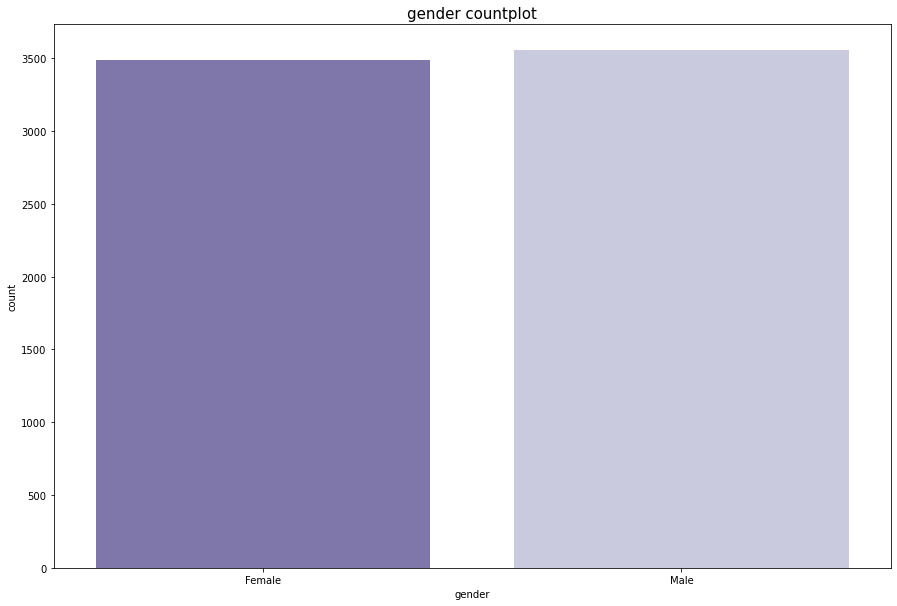

In [18]:
countplot_function(dataframe = df, column = 'gender', palette = random.choice(palette_values))

## Observation:

1. We see that there are equal number of male and female in our data. 
2. Therefore, the 2 groups are represented equally to understand their overall behavior towards Telco.

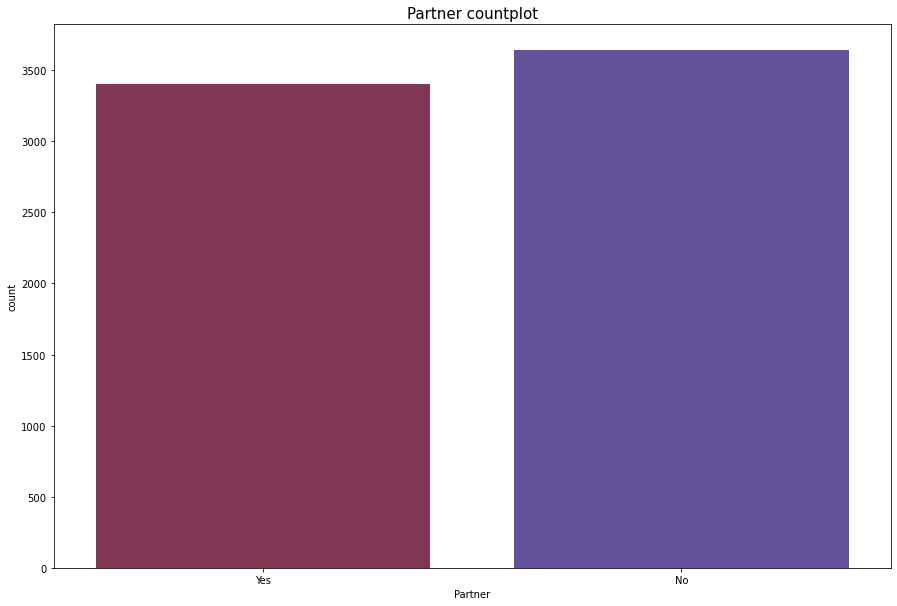

In [19]:
countplot_function(dataframe = df, column = "Partner", palette = random.choice(palette_values))

## Observation: 

1. There are more number of people who do not have partners compared to the ones who have partners.
2. Since we have more data for the people who do not have partners, we should be able to predict their behavior and determine well whether they would leave the telco service or not. 

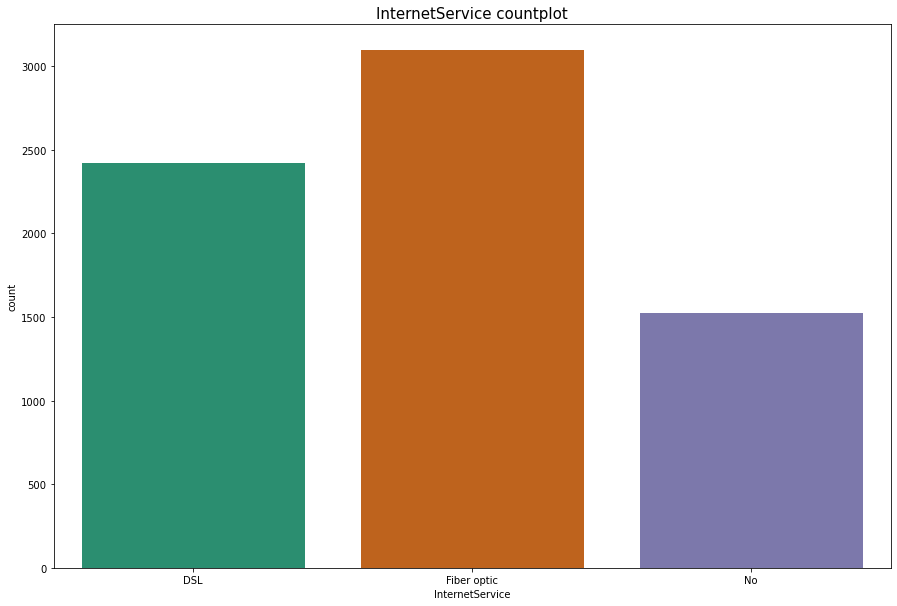

In [20]:
countplot_function(dataframe = df, column = "InternetService", palette = random.choice(palette_values))

## Observation:

1. It could be seen that most of the Telco services are Fiber Optic service as this option is becoming common among customers.
2. The data does a good job of reflecting the latest trends as most people opt fiber optic services compared to DSL services.

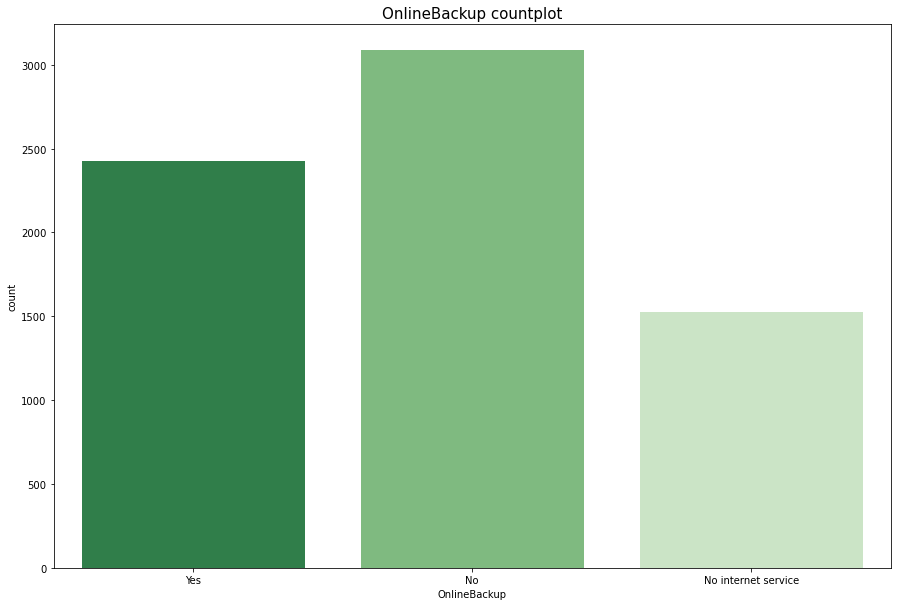

In [21]:
countplot_function(dataframe = df, column = "OnlineBackup", palette = random.choice(palette_values))

## Observation:

1. Most people in our data do not prefer Online Backup Services as clearly shown in the above plot.
2. There are quite a number of people who do not opt the internet service as well.
3. Therefore, we should also consider whether a person has an internet service or not before determining whether they would prefer online backup. 

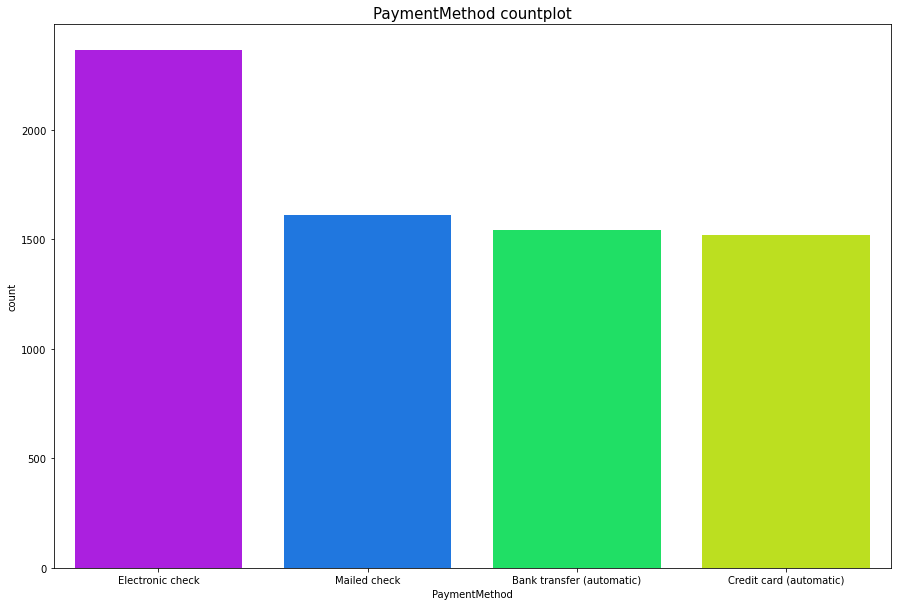

In [22]:
countplot_function(dataframe = df, column = "PaymentMethod", palette = random.choice(palette_values))

## Observation:

1. A large portion of users from Telco prefer Electronic Check compared to other options. 
2. There are other options which are popular among the customers as well such as Mailed check, Bank transfer (automatic) and Credit card (automatic) respectively.
3. As a result, we should be able to more accurately predict the behavior of the customers who use the payment method of electronic check compared to other methods. 

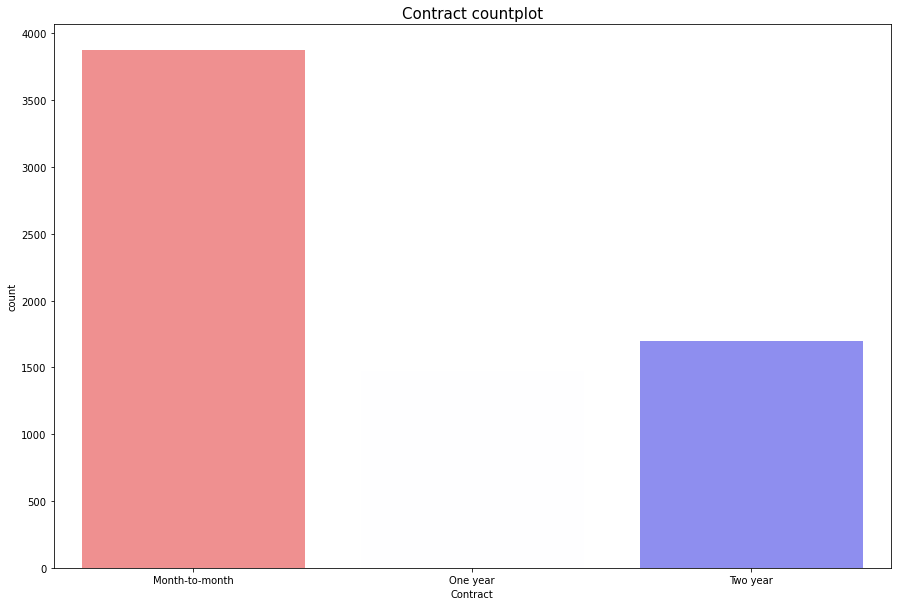

In [23]:
countplot_function(dataframe = df, column = "Contract", palette = random.choice(palette_values))

## Observation:

1. We have a significantly large portion of the data where the contract is month-to-month compared to either one-year and two-year contracts.
2. This is true in real-life as well because most of the customers prefer to stick with month-to-month contract rather than staying with the same service for a long period of time. 
3. Hence, we see that this data is quite reflective of the real-world. 

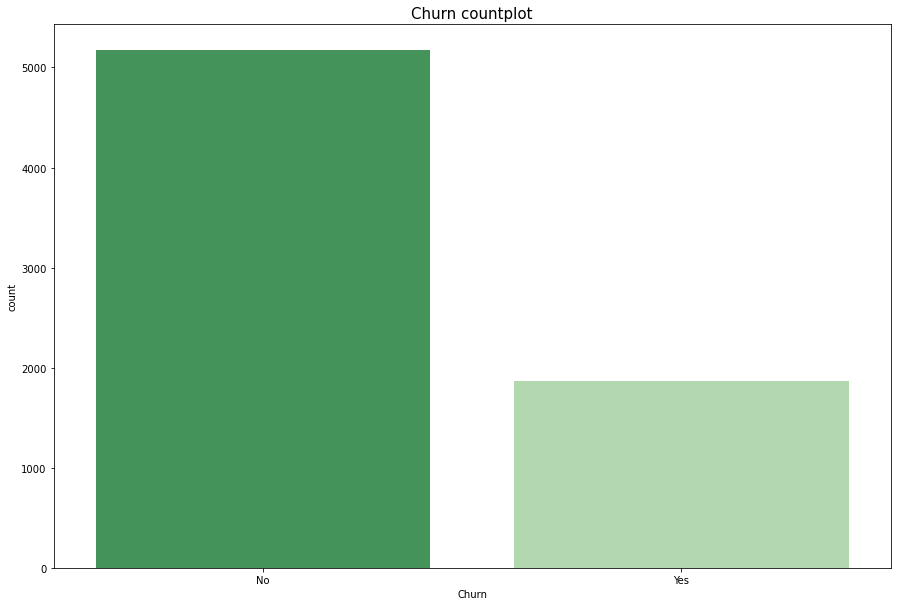

In [24]:
countplot_function(dataframe = df, column = "Churn", palette = random.choice(palette_values))

## Observation:

1. It is now important to observe the total number of customers who have churned (left the service) after a particular span of time.
2. We see that a large portion of our customers did not leave the service. 
3. We also see that there are a few customers who left the service. We see that there is no overwhelming difference between the count of the customers who stayed in the service vs customers who have left or churned. 
4. Hence, we can proceed with the data without adding additional customers who decided to churn. 

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
def boxplot_function(dataframe, x_value, y_value, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x = x_value, y = y_value, data = dataframe, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)
    plt.show()

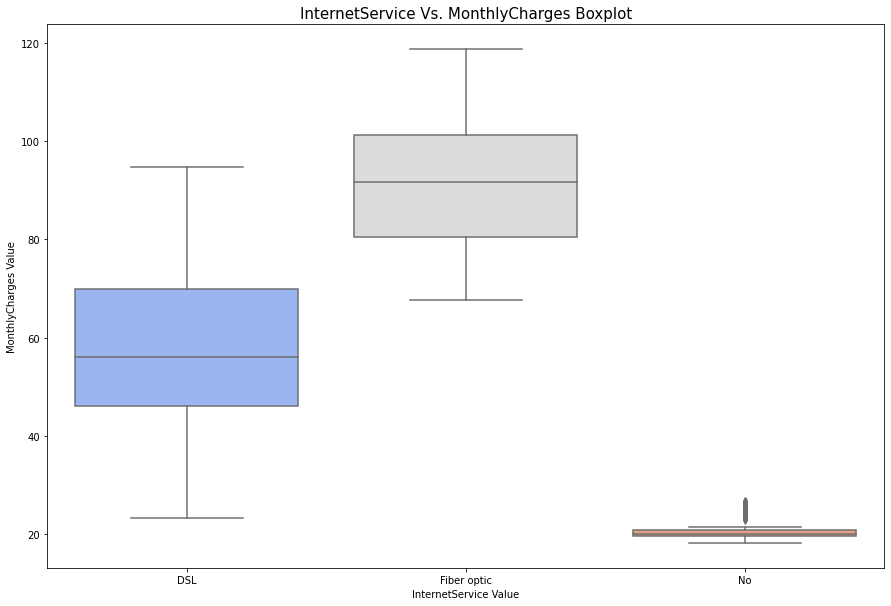

In [27]:
boxplot_function(dataframe = df, x_value = "InternetService", y_value = "MonthlyCharges", palette = "coolwarm")

## Observation:

1. It could easily be seen from the box plots that the people who opted for 'Fiber optic' service have higher monthly charges.
2. People who opted for 'DSL' service has signifantly lower monthly charges as shown above.
3. As expecte, customers who do not enroll in the internet service have low charges as shown. 

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


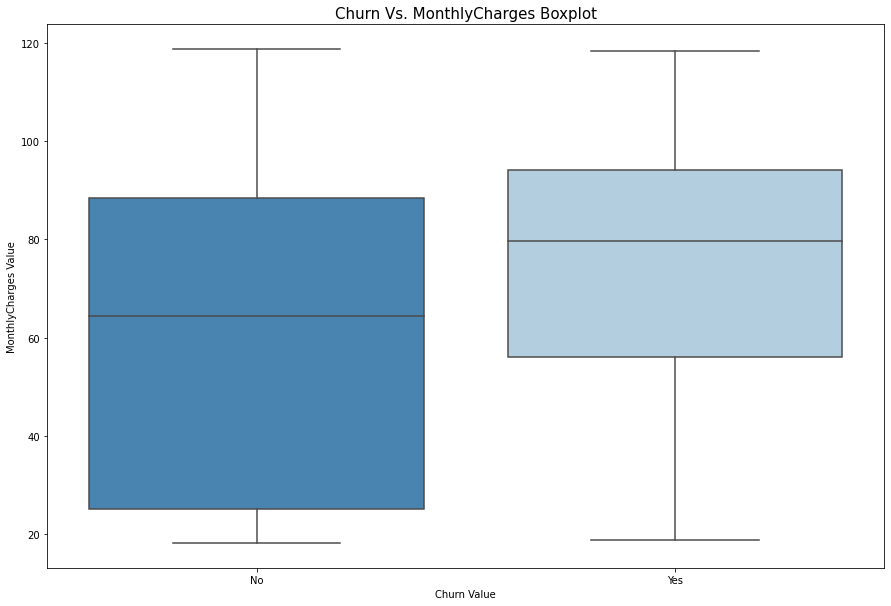

In [29]:
boxplot_function(dataframe = df, x_value = "Churn", y_value = "MonthlyCharges", palette = random.choice(palette_values))

## Observation:

1. It could be seen as the monthly charges are increasing, there is a higher possibility that the customers are inclined to leave the service.
2. People who stay in the service usually have low monthly charges.
3. Therefore, Telco company could take action based on the plots and reduce the prices of various services as this would ensure that most customers are inclined to stay in the service. 

In [30]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Used the above link to replace the missing value in 'Total Charges' to '0' so that 
# it would be easy to convert the values respectively.
## Replacing the missing value with Medin value from the Total Charges.
## This is because Median is robust to outliers.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', '1394.55'))

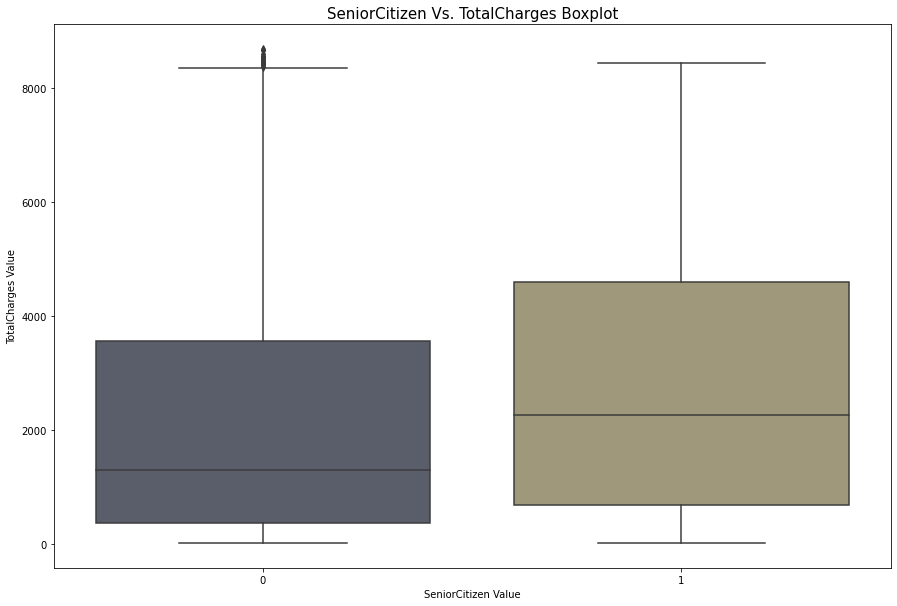

In [31]:
boxplot_function(dataframe = df, x_value = "SeniorCitizen", y_value = "TotalCharges", palette = random.choice(palette_values))

## Observation:

1. Based on the above boxplot, it could be seen that whether a person is a senior citizen or not has an impact of the total charges.
2. Senior citizens usually are quite rich and they usually work which means that they have higher income.
3. As a result, they might be opting for more services from Telco leading to higher total charges.

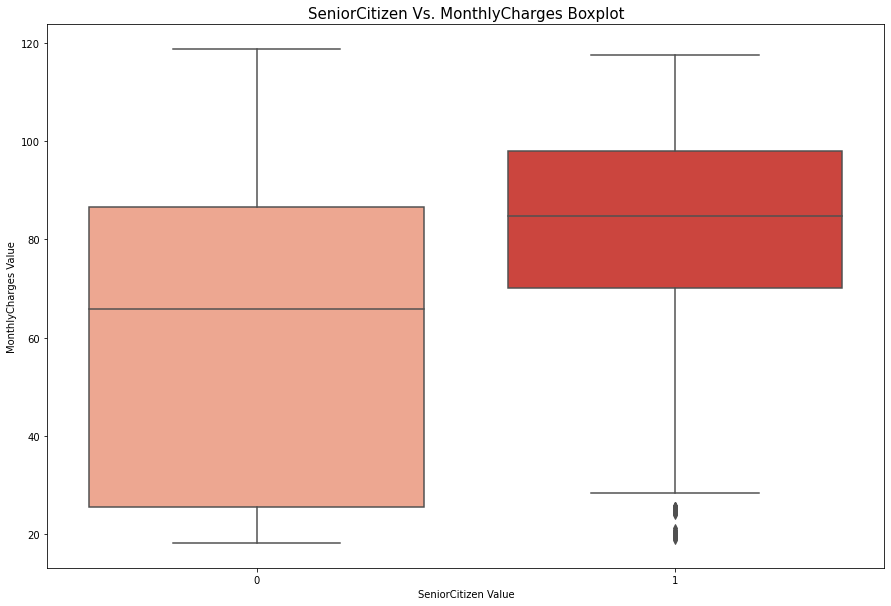

In [32]:
boxplot_function(dataframe = df, x_value = 'SeniorCitizen', y_value = 'MonthlyCharges', palette = random.choice(palette_values))

## Observation:

1. Monthly charges are significantly higher for Senior Citizens compared to Non-Senior Citizens respectively.
2. As a result, this leads us to believe that senior citizens are more inclined to add more services from Telco.
3. Therefore, Telco could take action and provide more interesting services to senior citizens compared to non-senior citizens.

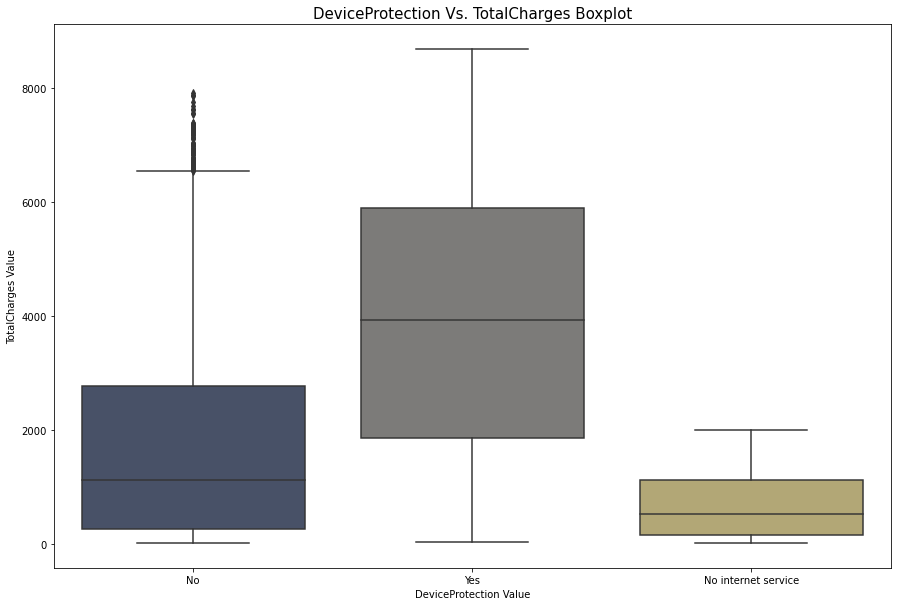

In [33]:
boxplot_function(dataframe = df, x_value = "DeviceProtection", y_value = "TotalCharges", palette = random.choice(palette_values))

## Observation:

1. Device Protection Plans have a very high cost as could be seen from the above.
2. This means that people are paying a lot for Device Protection plans.
3. We have seen from the previous plots that higher the charges, the more inclined are the customers to leave the Telco service.
4. Hence, Telco could take steps to reduce the prices for the Device Protection plans. 

In [34]:
def barplot_function(dataframe, x_value, y_value, hue = None, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.barplot(x = x_value, y = y_value, data = dataframe, hue = hue, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)
    plt.show()

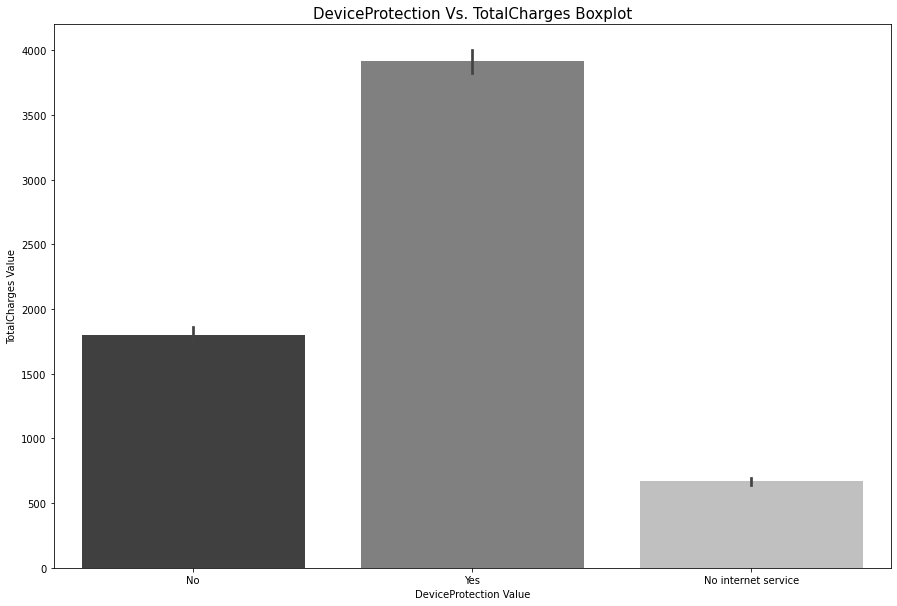

In [35]:
barplot_function(dataframe = df, x_value = 'DeviceProtection', y_value = 'TotalCharges', palette = random.choice(palette_values))

## Observation:

1. This is another way to represent the Device Projection plans and the total charges.
2. We have taken a barplot which represents the average total charges for all the customers based on the device projection plans.

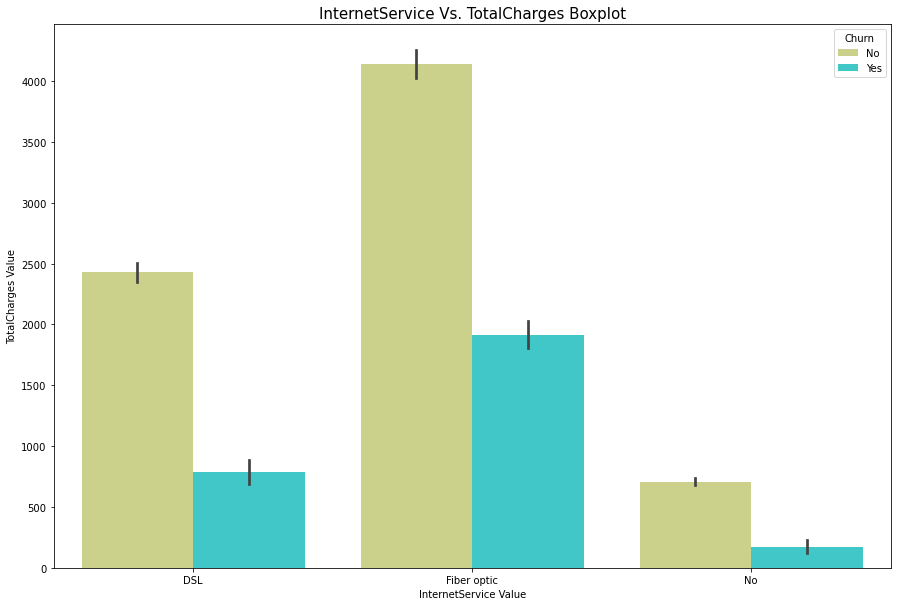

In [36]:
barplot_function(dataframe = df, x_value = 'InternetService', y_value = 'TotalCharges',
                 hue = 'Churn', palette = random.choice(palette_values))

## Observation:

1. Based on this plot, we see that a large portion of customers from Fiber optic option tend to leave the service compared to other internet services.
2. Other services such as DSL service have higher number of customers who are willing to stay with the service.
3. Therefore, Telco might consider what might be the potential case for customers who have taken fiber option to leave the service.
4. If they could come up with the right tactics to improve their fiber option service, this ensures that a large portion of customers are retained. 

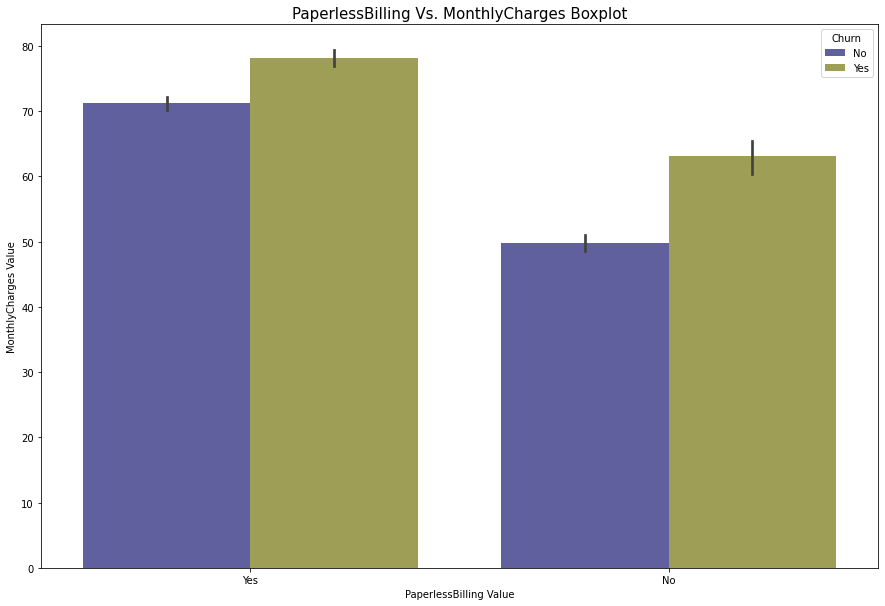

In [37]:
barplot_function(dataframe = df, x_value = 'PaperlessBilling', y_value = 'MonthlyCharges', hue = 'Churn', palette = random.choice(palette_values))

## Observation:

1. Paperless billing customers usually leverage the freedom to use their credit/debit cards and pay more amount compared to the others who prefer paper billing options.
2. This is because it is more convenient to use credit/debit cards to make transaction compared to other services.
3. Hence, whenever a new customer is going to register for the service, Telco can estimate the total charges that might be taken into consideration based on whether a customer opts for paperless billing or not. 

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


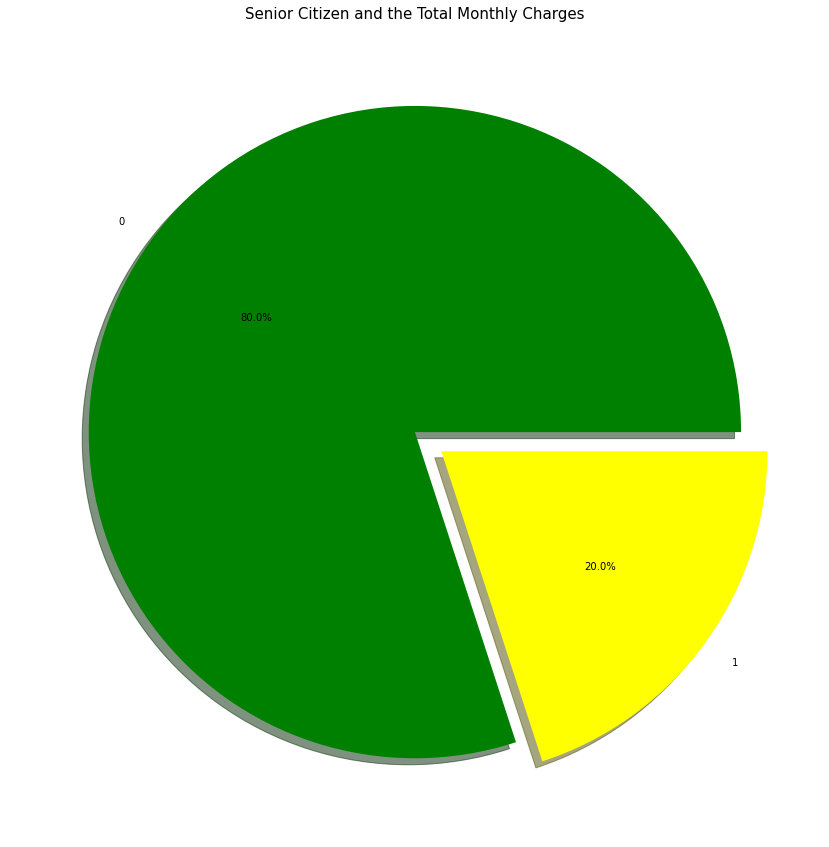

In [39]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'SeniorCitizen').sum()['MonthlyCharges'], labels = df.groupby(by = 'SeniorCitizen').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%', colors = ['Green', 'Yellow'])
plt.title('Senior Citizen and the Total Monthly Charges', fontsize = 15)
plt.show()

## Observation:

1. Based on the plots, it could be seen that senior citizens pay less amount compared to the non-seniors as shown in the above plot respectively. 
2. We have taken the total sum of the monthly charges for senior citizens by grouping them based on their classes as shown in the pie plot above.

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
df.groupby(by = 'PhoneService').sum()['MonthlyCharges']

PhoneService
No      28663.5
Yes    427453.1
Name: MonthlyCharges, dtype: float64

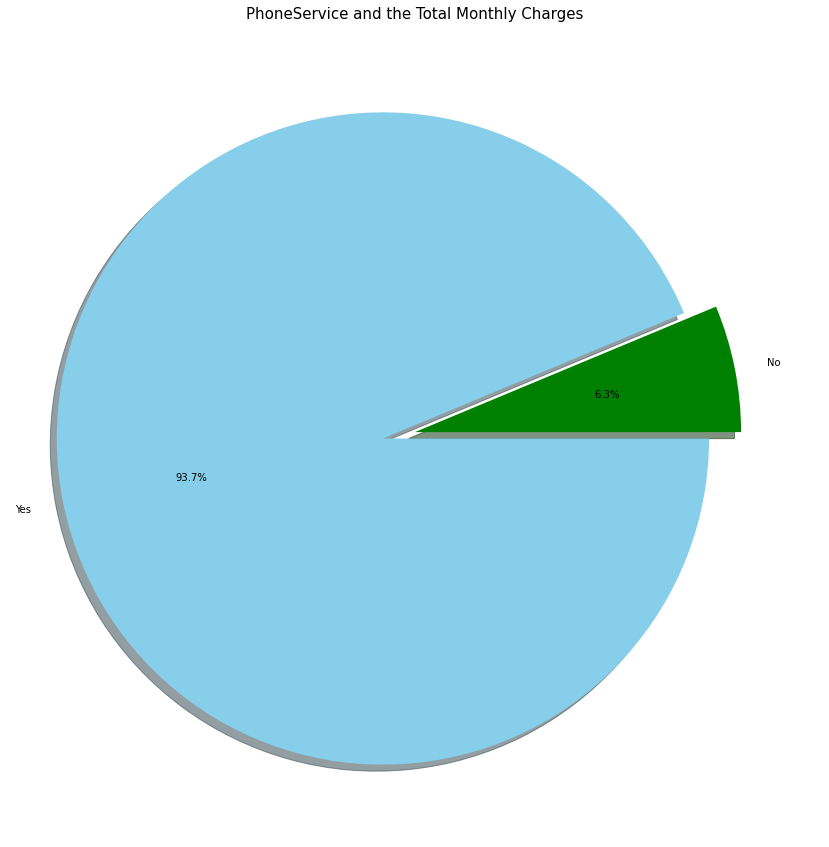

In [42]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'PhoneService').sum()['MonthlyCharges'], labels = df.groupby(by = 'PhoneService').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%', colors = ['Green', 'SkyBlue'])
plt.title('PhoneService and the Total Monthly Charges', fontsize = 15)
plt.show()

## Observation:

1. People who have enrolled in the phone service have a significantly higher proportion of the amount that is payed monthly.
2. People who did not enroll in the phone service has lower proportion of the amount that is payed monthly.

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.groupby(by = 'InternetService').sum()['MonthlyCharges']

InternetService
DSL            140665.35
Fiber optic    283284.40
No              32166.85
Name: MonthlyCharges, dtype: float64

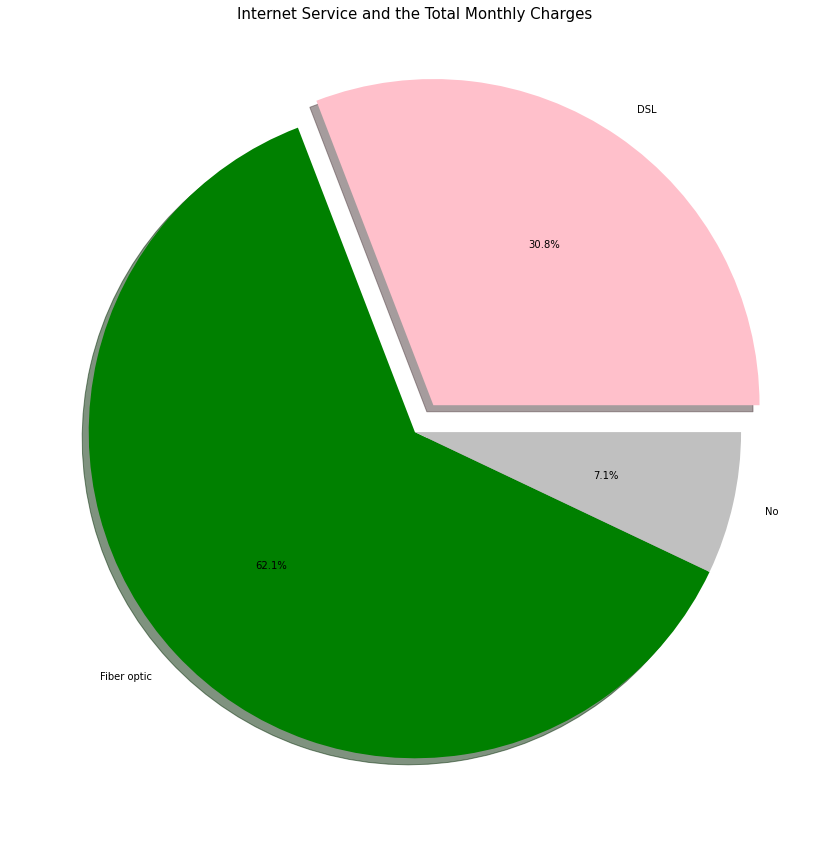

In [45]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'InternetService').sum()['MonthlyCharges'], labels = df.groupby(by = 'InternetService').sum().index,
       explode = (0.1, 0, 0), shadow = True,
       autopct = '%1.1f%%', colors = ['Pink', 'Green', 'Silver'])
plt.title('Internet Service and the Total Monthly Charges', fontsize = 15)
plt.show()

## Observation:

1. The total charges were significantly higher for the Fiber optic customers compared to the other options as indicated in the plots shown above.
2. There are other factors as well that would influence the monthly charges which in turn would influence whether a customer would churn from the service.

In [46]:
df_categorical = df.select_dtypes(include = "object")

In [47]:
df_numerical = df.select_dtypes(exclude = "object")

Displaying the columns in our data that are categorical in nature. 

In [48]:
print("The columns that are categorical in our data are:\n {}".format(df_categorical.columns))

The columns that are categorical in our data are:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


Displaying the columns in our data that are numerical in nature. 

In [49]:
print("The columns that are numerical in our data are:\n {}".format(df_numerical.columns))

The columns that are numerical in our data are:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


Displaying the head or the first 5 rows in our dataframe. 

In [50]:
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [51]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [52]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [57]:
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


Removing the feature that do not add a lot of meaning for our machine learning predictions. 

In [58]:
df_categorical.drop(['customerID'], axis = 1, inplace = True)

Performing the one hot encoding of the categorical features present in our dataset. 

In [59]:
pd.get_dummies(df_categorical.gender, drop_first = True).head()

,Male
0,0
1,1
2,1
3,1
4,0


In [60]:
df_dummy_encoding = pd.get_dummies(df_categorical, drop_first = True)

Combining the numerical and categorical features to form the final dataframe of interest. 

In [61]:
df_final = pd.concat([df_dummy_encoding, df_numerical], axis = 1)

In [62]:
df_final.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70.70,151.65


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df_final.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70.70,151.65


In [65]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825466
MonthlyCharges,0.220173,0.247900,1.000000,0.650865
TotalCharges,0.102652,0.825466,0.650865,1.000000


## Heatmap

Heatmaps are a good way to visualize our data and understanding trends from it. In our case, we consider the correlation between all the set of features and compute the correlation coefficients. But interpreting the numerical vector (correlation coefficient vector) can be tedious and quite difficult to comprehend. Therefore, we will now be using Heatmap plots which generate brightened colors if they find a particular value to be high or vice-versa. The reverse might also be true depending on the 'cmap' or 'palette' that we select for our heatmaps. 

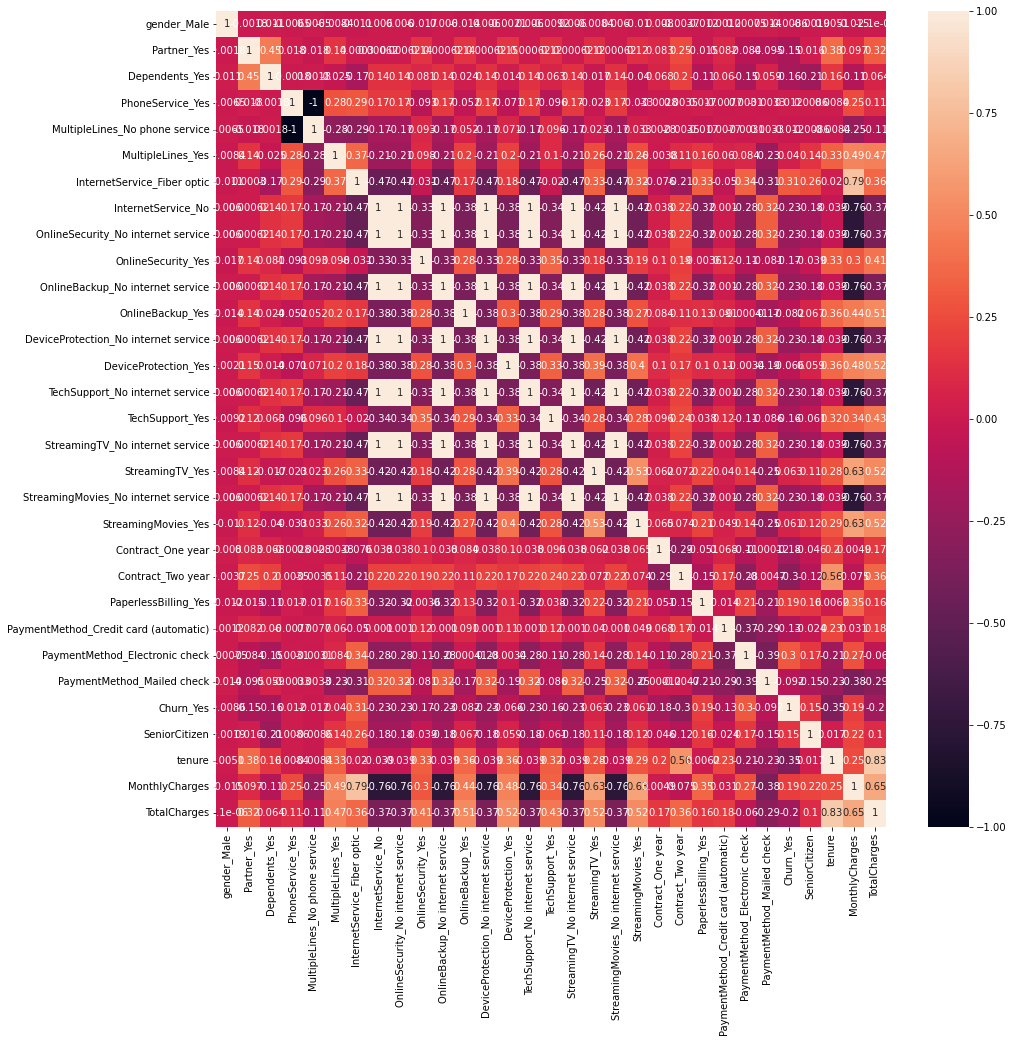

In [66]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

## Observation:

1. Based on the heatmap given, it could be seen that there is a strong correlation between the TotalCharges and the Tenure of staying in a service. This is true in real-life because the longer a customer stays in a service, the more willing he/she are going to be using that same service along with additional features or add-ons as well. 
2. It could also be seen that people who have opted for phone services from Telco did not opt for multiple lines of the same service. Therefore, we get to know that customers are open to adding multiple lines of different service providers rather than staying with the same phone service provider. 
3. Monthly charges are negatively correlated with whether a person has internet service, online security, online backup internet security, internet tech support, streaming TV service and streaming movies service. 
4. There are many other interesting trends in the data which we could find based on our analysis. But these observations are the most important and they could be used by the decision making committee to ensure that they get the best results. 

In [67]:
X = df_final.drop(['Churn_Yes'], axis = 1)
y = df_final['Churn_Yes']

## Train Test Split

It is now time to split our data into training and cross-validation data. This is because, we need to test whether our model is performing well on the unseen class (cross-validation and test data). We need to use cross-validation data to tune the hyperparameters and improve the performance of the best machine learning models.

We are going to be dividing the data in such a way whether the training data contains around 70% of the records and the test data contains around 30% of the records respectively. Below the code that implements these steps. 

In [68]:
X_train, X_cv, y_train, y_cv  = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Standardization

When we take data that is present in many scales, it can sometimes make the machine leanring models to assume that a particular feature is more important due to the fact that it is of an entirely different scale and so on. Therefore, we need to ensure that the entire data is of the same scale so that all the features are treated equally without giving more importance to one particular feature than the other. 

We perform standardization by taking the mean of a particular feature and subtracting from all the values from that particular feature and divide the results from the standard deviation of the same feature itself. This method is continued for all the features until each and every feature has a mean of 0 and a standard deviation of 1. Below are the set of steps that are performed to standardize the features. 

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_cv_transformed = scaler.transform(X_cv)

Printing the shape of the dataframe to get an understanding of the number of rows and columns we would be dealing with for our data. 

In [ ]:
print(len(X_train_transformed))

Printing the shape of the cross-validation dataframe to get an understanding of the number of rows and columns we would be dealing with for our data. 

In [71]:
print(len(X_cv_transformed))

2113


Checking to see for the training data whether we have equal number of classes. But it could be seen that there is class imbalance as we have seen earlier in the plots as well. In the next few cells, we would be performing class balancing so that the ML models learn to represent both the classes of interest with equal probability. 

In [72]:
y_train.value_counts()

0    3628
1    1302
Name: Churn_Yes, dtype: int64

Similarly, we can also take a look at the cross-validation data and find out the total number of classes and the count of them to see if there is a class imbalance respectively. 

In [73]:
y_cv.value_counts()

0    1546
1     567
Name: Churn_Yes, dtype: int64

In [74]:
len(X_train_transformed[0])

30

## K Neighbors Classifier

Since the output variable that we are going to be predicting is discrete, we are going to be using various machine learning classifiers for our task of predicting whether a customer is going to churn from a service or not. 

__Note:__ We would be first performing class balancing which can be done with the library "imbalanced-learn" that can also be dowloaded using simple "pip" or "conda" commands. Below is the cell you might uncomment and run if you do not have this library installed already. 

In [75]:
#!pip install -U imbalanced-learn

In [76]:
from imblearn.over_sampling import SMOTE

## Class Balancing

One of the most popular methods to perform class balancing is with SMOTE. We will initialize it and fit our training and cross-validation data points which ensure that we have equal number of classes which we are interested to work and proceed. Below is the code sample that exactly shows all these steps. 

In [77]:
sampler = SMOTE()
X_train_transformed, y_train = sampler.fit_resample(X_train_transformed, y_train)
X_cv_transformed, y_cv = sampler.fit_resample(X_cv_transformed, y_cv)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

After performing the class balancing, we are now going to fit our data with the K Neighbors Classifier and understand the performance of the models and their predictions respectively. 

In [79]:
model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [81]:
print(confusion_matrix(y_cv, y_predictions))

[[1044  502]
 [ 400 1146]]


In [82]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1546
           1       0.70      0.74      0.72      1546

    accuracy                           0.71      3092
   macro avg       0.71      0.71      0.71      3092
weighted avg       0.71      0.71      0.71      3092



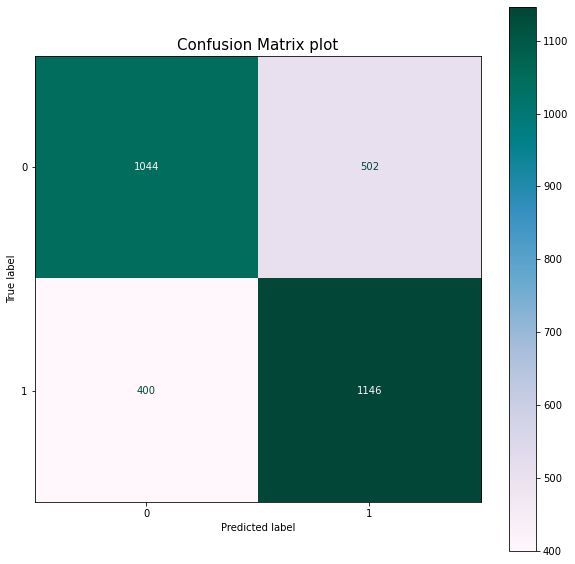

In [83]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'PuBuGn')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.761044861420952


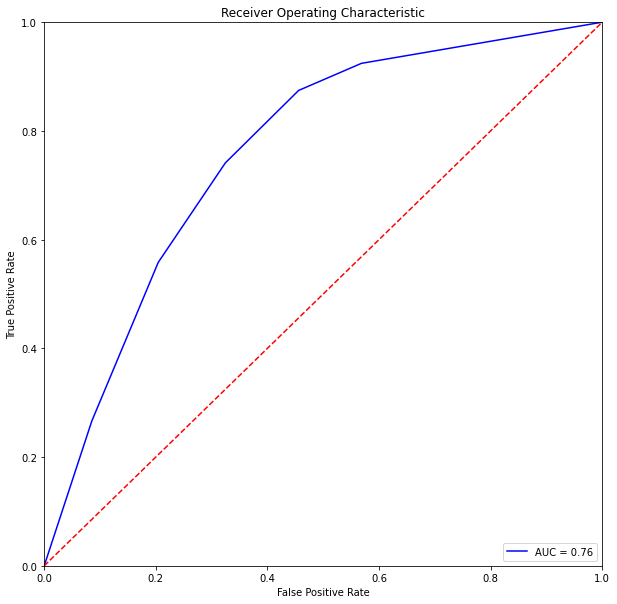

In [84]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet 
## which was modified for our application

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Classifier

In [85]:
from sklearn.svm import SVC

In [86]:
model = SVC(probability = True)
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [87]:
print(confusion_matrix(y_cv, y_predictions))

[[1213  333]
 [ 328 1218]]


In [88]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1546
           1       0.79      0.79      0.79      1546

    accuracy                           0.79      3092
   macro avg       0.79      0.79      0.79      3092
weighted avg       0.79      0.79      0.79      3092



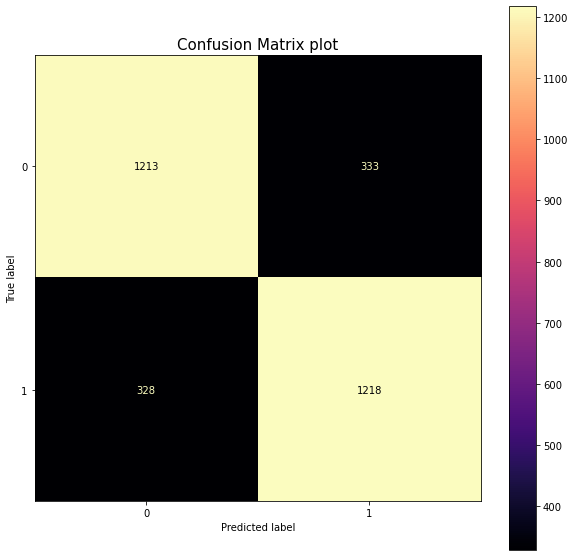

In [89]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'magma')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8700529597726636


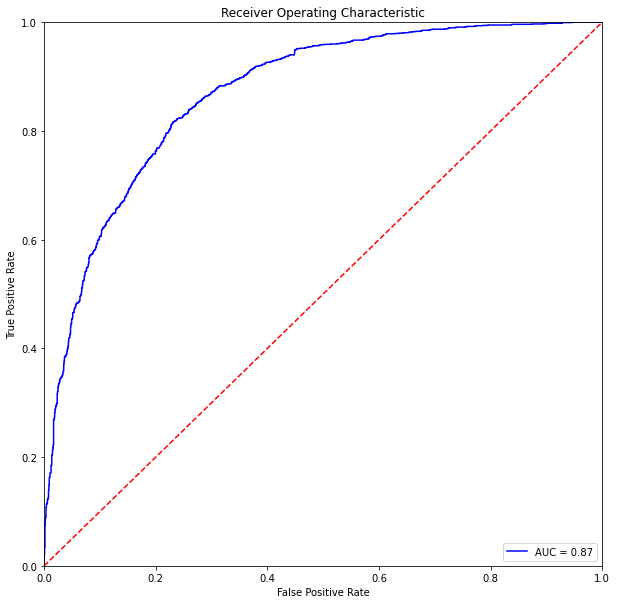

In [90]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [93]:
print(confusion_matrix(y_cv, y_predictions))

[[1154  392]
 [ 301 1245]]


In [94]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1546
           1       0.76      0.81      0.78      1546

    accuracy                           0.78      3092
   macro avg       0.78      0.78      0.78      3092
weighted avg       0.78      0.78      0.78      3092



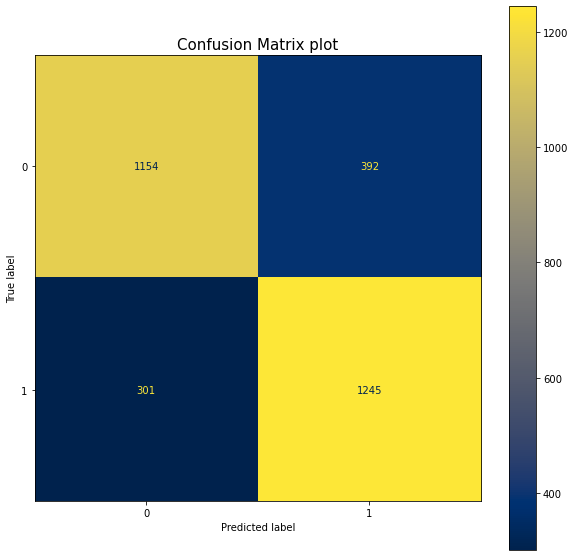

In [95]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'cividis')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8551444783433104


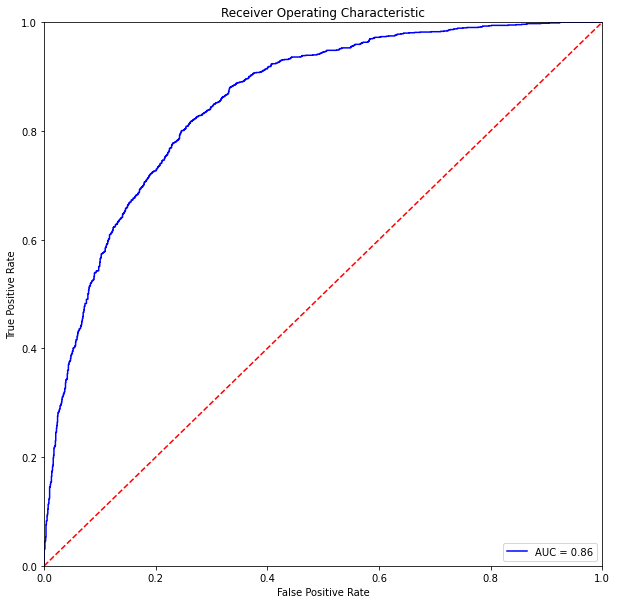

In [96]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [99]:
print(confusion_matrix(y_cv, y_predictions))

[[1226  320]
 [ 487 1059]]


In [100]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1546
           1       0.77      0.68      0.72      1546

    accuracy                           0.74      3092
   macro avg       0.74      0.74      0.74      3092
weighted avg       0.74      0.74      0.74      3092



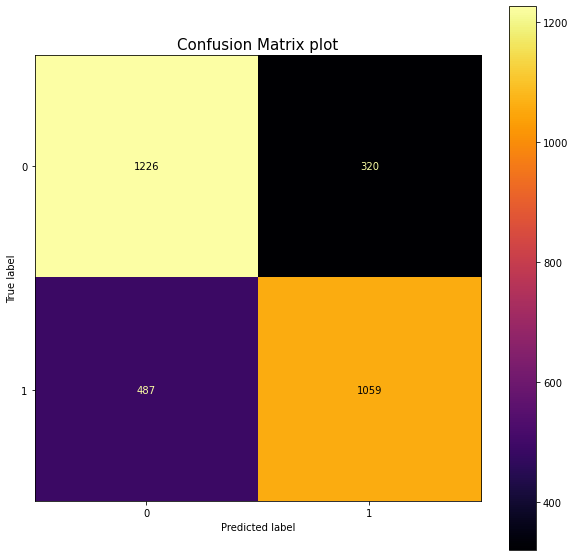

In [101]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'inferno')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.7411631904058212


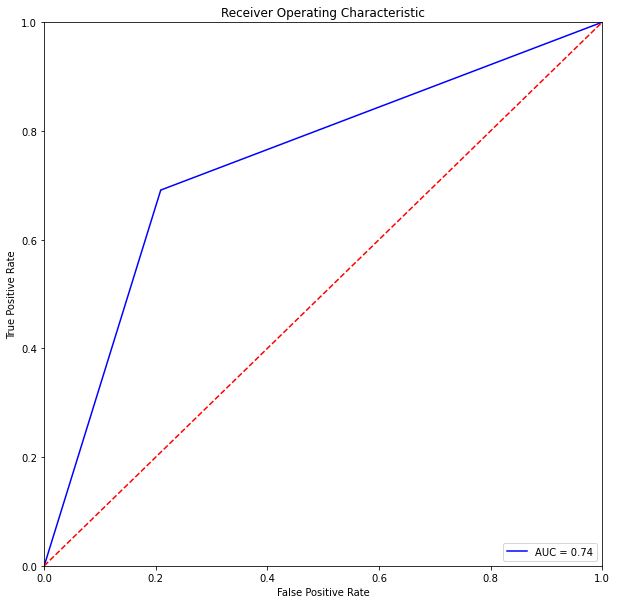

In [102]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gaussian Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
model = GaussianNB()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [105]:
print(confusion_matrix(y_cv, y_predictions))

[[ 948  598]
 [ 197 1349]]


In [106]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1546
           1       0.69      0.87      0.77      1546

    accuracy                           0.74      3092
   macro avg       0.76      0.74      0.74      3092
weighted avg       0.76      0.74      0.74      3092



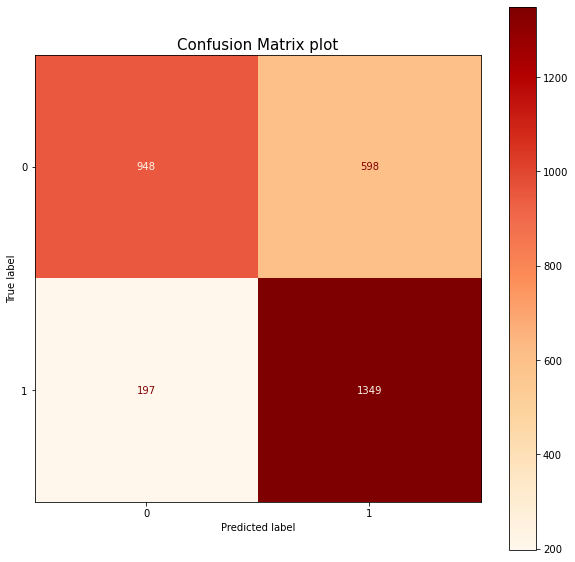

In [107]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'OrRd')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8329689856057196


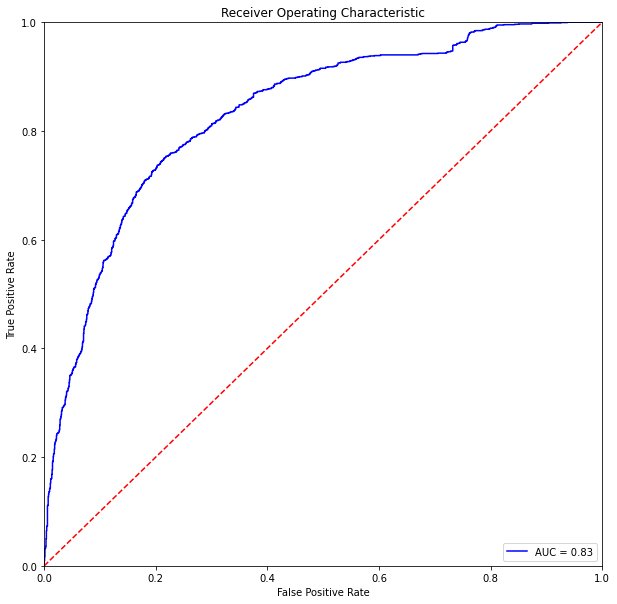

In [108]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [111]:
print(confusion_matrix(y_cv, y_predictions))

[[1315  231]
 [ 425 1121]]


In [112]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1546
           1       0.83      0.73      0.77      1546

    accuracy                           0.79      3092
   macro avg       0.79      0.79      0.79      3092
weighted avg       0.79      0.79      0.79      3092



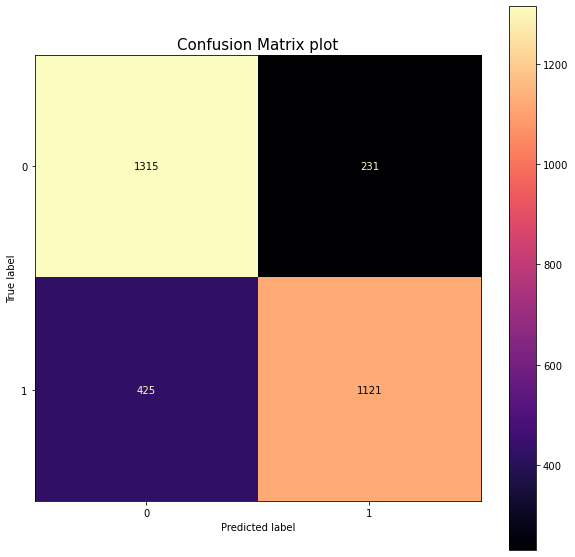

In [113]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'magma')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8816630657256802


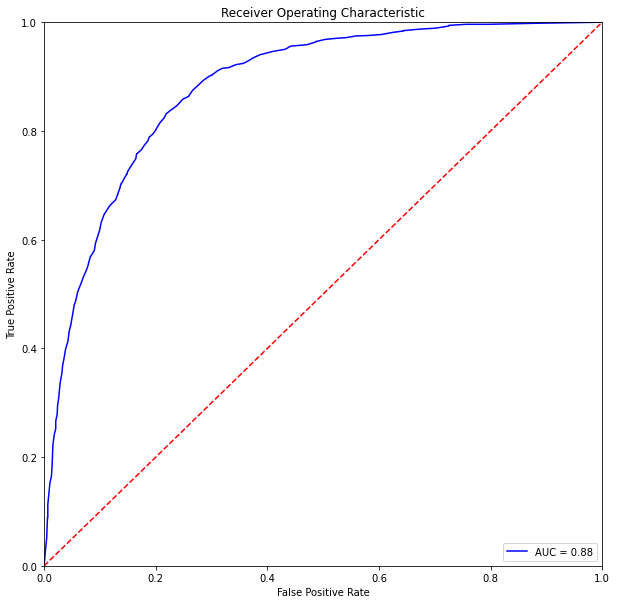

In [114]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Xgb Classifier

In [115]:
#!pip install xgboost

In [116]:
import xgboost as xgb

In [117]:
model = xgb.XGBClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

[15:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
print(confusion_matrix(y_cv, y_predictions))

[[1331  215]
 [ 278 1268]]


In [119]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1546
           1       0.86      0.82      0.84      1546

    accuracy                           0.84      3092
   macro avg       0.84      0.84      0.84      3092
weighted avg       0.84      0.84      0.84      3092



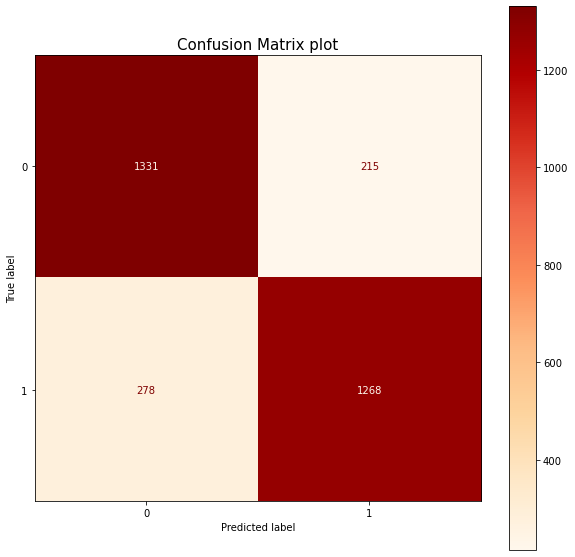

In [120]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'OrRd')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.9260937544453909


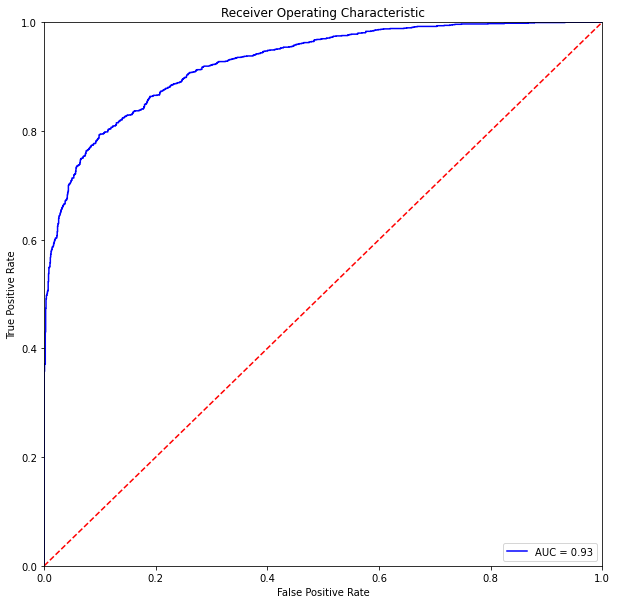

In [121]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Observation:
1. It could be seen from the above plots that the XBG model is performing better than all the remaining models that we have tried and tested as shown above. 
2. Therefore, we will now use our XGB model and perform hyperparameter tuning to get the best results and improving the AUC even further. 

## Hyperparameter tuning of XGB model

In [151]:
sub_sample = [0.1, 0.2, 0.3, 0.5, 0.7, 1]

In [152]:
import warnings
warnings.filterwarnings("ignore")

In [153]:
for sample_value in sub_sample:
    model = xgb.XGBClassifier(subsample = sample_value, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_train_transformed, y_train)        
    y_predictions = model.predict(X_cv_transformed)
    print("The percentage of samples used in XGB model = {}%".format(np.round(sample_value * 100, 2)))
    print(classification_report(y_predictions, y_cv))
    print("\n")

The percentage of samples used in XGB model = 10.0%
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1613
           1       0.78      0.81      0.79      1479

    accuracy                           0.80      3092
   macro avg       0.80      0.80      0.80      3092
weighted avg       0.80      0.80      0.80      3092



The percentage of samples used in XGB model = 20.0%
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1603
           1       0.81      0.84      0.83      1489

    accuracy                           0.83      3092
   macro avg       0.83      0.83      0.83      3092
weighted avg       0.83      0.83      0.83      3092



The percentage of samples used in XGB model = 30.0%
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1598
           1       0.81      0.84      0.82      1494

    accuracy          

In [158]:
max_depth_values = [1, 2, 3, 5, 10, 50, 100]

for depth in max_depth_values:
    model = xgb.XGBClassifier(max_depth = depth, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_train_transformed, y_train)
    print("The depth of the trees = {}".format(depth, 2))
    y_predictions = model.predict(X_cv_transformed)
    print(classification_report(y_predictions, y_cv))
    print("\n")

The depth of the trees = 1
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1449
           1       0.85      0.80      0.82      1643

    accuracy                           0.82      3092
   macro avg       0.82      0.82      0.82      3092
weighted avg       0.82      0.82      0.82      3092



The depth of the trees = 2
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1561
           1       0.85      0.85      0.85      1531

    accuracy                           0.85      3092
   macro avg       0.85      0.85      0.85      3092
weighted avg       0.85      0.85      0.85      3092



The depth of the trees = 3
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1566
           1       0.84      0.85      0.85      1526

    accuracy                           0.85      3092
   macro avg       0.85      0.85      0.85

In [149]:
num_estimator_values = [1, 2, 5, 10, 20, 50, 100, 500]
for estimators in num_estimator_values:
    model = xgb.XGBClassifier(n_estimators = estimators, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_train_transformed, y_train)
    y_predictions = model.predict(X_cv_transformed)
    print("The total number of estimators used in XGB model = {}".format(estimators))
    print(classification_report(y_predictions, y_cv))
    print("\n")

The total number of estimators used in XGB model = 1
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1400
           1       0.84      0.76      0.80      1692

    accuracy                           0.79      3092
   macro avg       0.79      0.79      0.79      3092
weighted avg       0.79      0.79      0.79      3092



The total number of estimators used in XGB model = 2
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1424
           1       0.84      0.78      0.81      1668

    accuracy                           0.80      3092
   macro avg       0.80      0.80      0.80      3092
weighted avg       0.80      0.80      0.80      3092



The total number of estimators used in XGB model = 5
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1450
           1       0.84      0.79      0.82      1642

    accuracy       

In [163]:
best_number_of_estimators = 100
best_subsamples = 1
best_max_depth_values = 2

model = xgb.XGBClassifier(n_estimators = best_number_of_estimators, max_depth = best_max_depth_values, 
                         subsample = best_subsamples, eval_metric = 'logloss', n_jobs = -1)
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1561
           1       0.85      0.85      0.85      1531

    accuracy                           0.85      3092
   macro avg       0.85      0.85      0.85      3092
weighted avg       0.85      0.85      0.85      3092



In [164]:
print(confusion_matrix(y_cv, y_predictions))

[[1324  222]
 [ 237 1309]]


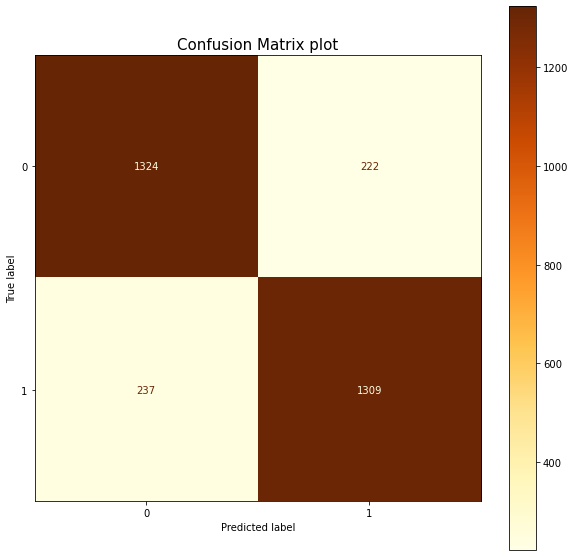

In [168]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'YlOrBr')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.9349483456033095


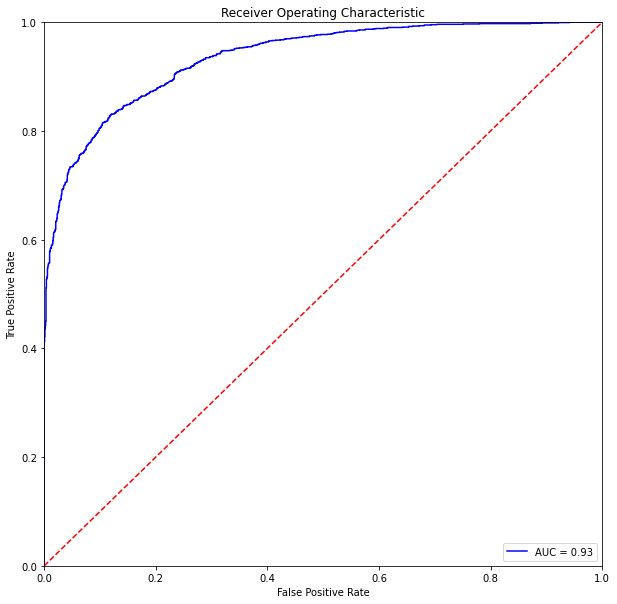

In [169]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code snippet
## which was modified for our application. 

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()